# Cancer Type Classification

In this notebook I try to classify cancer types based on gene expressions for 5,400 samples. After splitting the data into trainig and testing sets, in order to make computation more feasible, I first reduce the dimensionality of our feature matrix using the PCA algorithm from 60,483 to 1,000. The first 1,000 components explained about 64% of the variance in hte original dataset. I also observed that the accuracy of both traditional and deep learning methods improved with fewer dimensions. 

Later, I try the five traditional ML algorithms in the following order: 
* k-nearest neighbors
* Support Vector Machine
* Naive Bayes 
* Decision Tree
* Random Forest

Out of these algorithms, the support vector classifier (SVC) with linear kernel performs the best with 97.7% cross-validated accuracy and F1 scores. I later inspect the coefficients in the fitted SVC to identify the most important principal components in classifying cancer types, and later inspect the loadings of those components to pinpoint the genes that contributed the most to the decision making of the SVC. 

I later use the SVC model trained on the full training set to make predictions on the holdout set. The classifier achieves even higher accuracy (perhaps because it was trained on more data) with a score of 98.44%. The confusion matrix for the SVC model shows that the model had the most difficulty in distinguishing cancers of type 5 and 6, as well as 2 and 3. 

Later I build a deep learning classifier for the same task and †est the deep learning classifer with different training sizes. The performance of the model in peaks when the training size is at 85% with a cross validated accuracy score of 98.5%, and starts to decrease as it gets fewer and fewer data to train on. Later I use this size to train the model on all training samples and validate it using the hold out set. The model achieves an accuracy score of 98.15%, making the most mistakes in predicting cancer types 6 and 2. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, make_scorer
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Data

In [2]:
type_all = pd.read_csv('data/type.all.csv')

In [4]:
type_all.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
0,16,19.0,11.7,19.1,17.1,15.5,16.0,18.3,18.9,16.3,...,0,0,0,0,0,0,0,0,0,0
1,12,16.5,0.0,21.3,15.5,14.9,17.4,17.6,20.1,17.7,...,0,0,0,0,0,0,0,0,0,0
2,5,19.8,9.7,20.4,16.4,14.2,13.9,21.5,20.0,18.7,...,0,0,0,0,0,0,0,0,0,0
3,7,16.7,0.0,19.3,15.9,16.1,16.8,16.2,19.2,18.6,...,0,0,0,0,0,0,0,0,0,0
4,16,16.4,10.2,19.3,15.5,15.0,15.6,17.3,18.7,17.4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
type_all.shape

(5400, 60484)

# Pre-processing

## Seperate labels and features

In [9]:
y_all = type_all['Type']
X_all = type_all.drop('Type', axis=1)

In [10]:
del type_all

## Split into training and validation sets

In [12]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, 
                                                    test_size=.25, random_state=1)

In [13]:
del X_all, y_all

## Reduce dimensions

In [ ]:
pca = PCA(n_components=1000)
X_all_train = pca.fit_transform(X_all_train)

In [ ]:
pca.explained_variance_ratio_.sum()

# Classification

* k-nearest neighbors
* Support Vector Machine (SVM)
* Naive Bayes
* Decision Tree
* Random Forest

In [17]:
def display_cv_metrics(metrics):
    for k, v in metrics.items():
        print(f'{k}: {np.round(v.mean(), 3)}')

In [18]:
f1 = make_scorer(f1_score, average='weighted')
accuracy = make_scorer(accuracy_score)
metrics = {'accuracy': accuracy, 'f1': f1}

In [19]:
skf = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

## k-nearest neighbors

In [20]:
knn = KNeighborsClassifier()

In [22]:
knn_scores_all = cross_validate(estimator=knn, 
                              X=X_all_train,
                              y=y_all_train,
                              scoring=metrics,
                              cv=skf)

In [24]:
display_cv_metrics(knn_scores_all)

fit_time: 0.096
score_time: 5.476
test_accuracy: 0.939
test_f1: 0.939


## Support Vector Machine

In [25]:
svc = SVC(kernel='linear')

In [27]:
svc_scores_all = cross_validate(estimator=svc, 
                              X=X_all_train,
                              y=y_all_train,
                              scoring=metrics,
                              cv=skf)

In [29]:
display_cv_metrics(svc_scores_all)

fit_time: 2.821
score_time: 2.282
test_accuracy: 0.977
test_f1: 0.977


## Naive Bayes Classifier

In [30]:
nb = GaussianNB()

In [32]:
nb_scores_all = cross_validate(estimator=nb, 
                              X=X_all_train,
                              y=y_all_train,
                              scoring=metrics,
                              cv=skf)

In [34]:
display_cv_metrics(nb_scores_all)

fit_time: 0.035
score_time: 0.107
test_accuracy: 0.785
test_f1: 0.797


## Decision Tree Classifier

In [35]:
dt = DecisionTreeClassifier(random_state=1)

In [37]:
dt_scores_all = cross_validate(estimator=dt, 
                              X=X_all_train,
                              y=y_all_train,
                              scoring=metrics,
                              cv=skf)

In [39]:
display_cv_metrics(dt_scores_all)

fit_time: 2.812
score_time: 0.006
test_accuracy: 0.817
test_f1: 0.817


## Random Forest Classifier

In [40]:
rf = RandomForestClassifier(max_depth=3, random_state=1)

In [42]:
rf_scores_all = cross_validate(estimator=rf, 
                              X=X_all_train,
                              y=y_all_train,
                              scoring=metrics,
                              cv=skf)

In [44]:
display_cv_metrics(rf_scores_all)

fit_time: 1.866
score_time: 0.021
test_accuracy: 0.892
test_f1: 0.89


## Selecting the best performer

In [47]:
scores_all = [knn_scores_all, svc_scores_all, nb_scores_all, 
              dt_scores_all, rf_scores_all]

names = ['K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 
        'Decision Tree Classifier', 'Random Forest Classifier']

In [48]:
for score in scores_all:
    for k, v in score.items():
        score[k] = v.mean()

In [49]:
pd.DataFrame(scores_all, index=names)

,fit_time,score_time,test_accuracy,test_f1
K-Nearest Neighbors,0.096226,5.475551,0.939259,0.939038
Support Vector Classifier,2.821339,2.282155,0.977284,0.977226
Naive Bayes Classifier,0.034724,0.106896,0.784938,0.796539
Decision Tree Classifier,2.812370,0.005879,0.817037,0.817369
Random Forest Classifier,1.865967,0.021155,0.891605,0.889688


Support Vector Classifier with linear kernel seems to be the best performer across f1 and accuracy metrics at almost 98% cross-validated accuracy score.

## Important genes in classifying cancer types

### SVC Feature Importances

In [19]:
svc = SVC(kernel='linear')
svc.fit(X_all_train, y_all_train)

SVC(kernel='linear')

In [21]:
pc_names = [f'PC{i}' for i in range(1, pca.n_components + 1)]
names, imp = zip(*sorted(zip(pc_names, svc.coef_[0]), key=lambda x: abs(x[1])))

20 components with the highest absolute coefficients from the total of 1000 components. Especially PC1 and PC2 seems to be the most important ones. We can look at PCA loadings to see which genes had the most impact on these two components that influenced the decision of the SVC the most. 

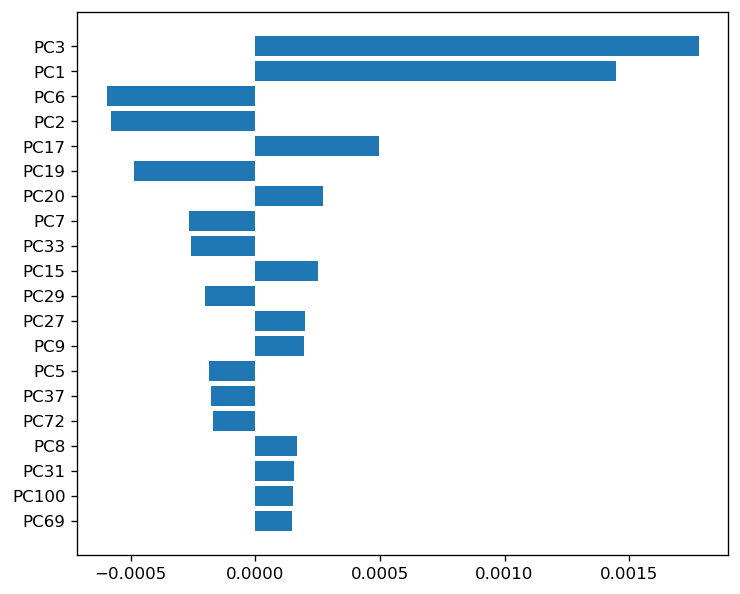

In [22]:
plt.figure(figsize=(7, 6), dpi=120)
plt.barh(y=names[-20:], width=imp[-20:]);

In [23]:
# get just one row as we are only interested in the headers
col_names = pd.read_csv('data/type.all.csv', nrows=1).columns[1:]

In [24]:
loadings = pca.components_.T

In [25]:
loading_matrix = pd.DataFrame(loadings, columns=pc_names, index=col_names)

In [39]:
pd.options.mode.chained_assignment = None  # default='warn'

top2 = list(names)[::-1][:2]
top2_df = loading_matrix[top2]
top2_df.loc[:, 'PC3+1'] = abs(top2_df).max(axis=1)
top2_df.sort_values('PC3+1', ascending=False, inplace=True)

Genes that contributed to the most important principal components the most:

In [46]:
list(zip(range(1, 11), top2_df.head(10).index))

[(1, 'ENSG00000205420.9'),
 (2, 'ENSG00000169469.8'),
 (3, 'ENSG00000137440.4'),
 (4, 'ENSG00000206075.12'),
 (5, 'ENSG00000185479.5'),
 (6, 'ENSG00000186847.5'),
 (7, 'ENSG00000169474.4'),
 (8, 'ENSG00000167656.4'),
 (9, 'ENSG00000105388.13'),
 (10, 'ENSG00000230937.8')]

## Confusion matrix with the predictions on the holdout set

### Support Vector Machine

First reducing the dimensions of the holdout set using the initial PCA fit. 

In [49]:
X_all_test = pca.transform(X_all_test)

In [50]:
y_all_pred = svc.predict(X_all_test)

In [51]:
cf_matrix = confusion_matrix(y_all_test, y_all_pred, normalize='true')

In [53]:
test_accuracy = (y_all_pred == y_all_test).sum() / len(y_all_test)
print(f"Test accuracy is {np.round(test_accuracy * 100, 2)}%")

Test accuracy is 98.44%


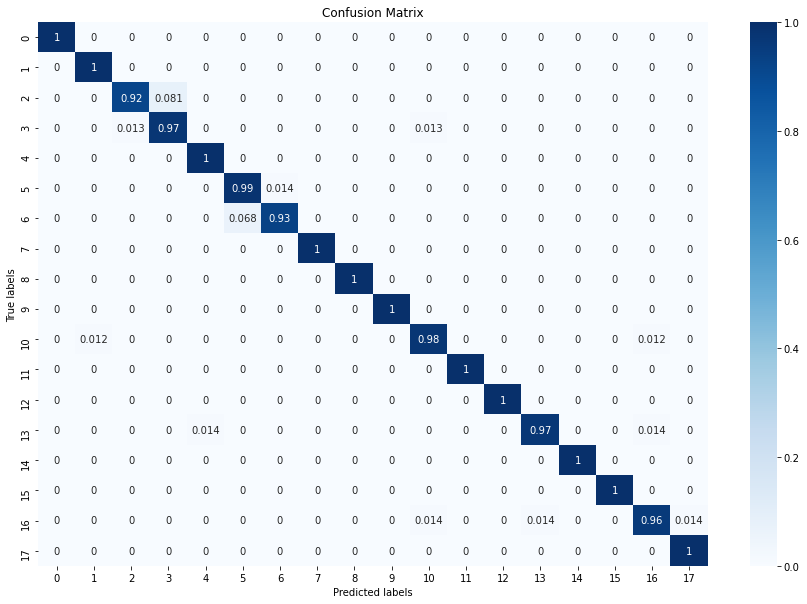

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');

# Deep Learning Classifier

In [26]:
# reset all variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [41]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cols = pd.read_csv('data/type.all.csv', nrows=1).columns[1:]
dtypes = {i: 'float16' for i in cols}
type_all = pd.read_csv('data/type.all.csv', dtype=dtypes, engine='c')
y_all = type_all['Type']
y_all = to_categorical(y_all)
X_all = type_all.drop('Type', axis=1)
del type_all

In [3]:
input_layer = Input(shape=(1000,))
dense = Dense(512, activation='relu')(input_layer)
dense = Dense(128, activation='relu')(dense)
dense = Dense(64, activation='relu')(dense)
output = Dense(19, activation='softmax')(dense)

model = Model(input_layer, output)
random_weights = model.get_weights()

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
test_sizes = np.arange(0.05, 0.8, 0.05)
learning_dict = {'Test sizes': test_sizes, 
                'Accuracy': [],
                'Loss': []}

for size in test_sizes:
    model.set_weights(random_weights)
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, 
                                                        test_size=size, random_state=1)
    pca = PCA(n_components=1000)
    X_all_train = pca.fit_transform(X_all_train)
    X_all_test = pca.transform(X_all_test)
    
    model.fit(X_all_train, y_all_train, epochs=100, 
       batch_size=20)
    loss, accuracy = model.evaluate(X_all_test, y_all_test, verbose=2)
    learning_dict['Loss'].append(loss)
    learning_dict['Accuracy'].append(accuracy)

Epoch 1/100
257/257 [==============================] - 1s 2ms/step - loss: 3.3430 - accuracy: 0.7031
Epoch 2/100
257/257 [==============================] - 1s 2ms/step - loss: 0.1993 - accuracy: 0.9654
Epoch 3/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0617 - accuracy: 0.9864
Epoch 4/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9935
Epoch 5/100
257/257 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9878
Epoch 6/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9905
Epoch 7/100
257/257 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.9761
Epoch 8/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0539 - accuracy: 0.9913
Epoch 9/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9904
Epoch 10/100
257/257 [==============================] - 1s 2ms/step - loss: 0.0314 - accura

243/243 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9934
Epoch 59/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0195 - accuracy: 0.9947
Epoch 60/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 61/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 62/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 63/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 64/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 65/100
243/243 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 66/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 67/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 

216/216 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9836
Epoch 15/100
216/216 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9856
Epoch 16/100
216/216 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9912
Epoch 17/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9944
Epoch 18/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9944
Epoch 19/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9954
Epoch 20/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9949
Epoch 21/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9947
Epoch 22/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9958
Epoch 23/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 

203/203 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 75/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 76/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 77/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9958
Epoch 78/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 79/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9953
Epoch 80/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9889
Epoch 81/100
203/203 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9901
Epoch 82/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9884
Epoch 83/100
203/203 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 

189/189 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.9646
Epoch 55/100
189/189 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9714
Epoch 56/100
189/189 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9823
Epoch 57/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9862
Epoch 58/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9881
Epoch 59/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9902
Epoch 60/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9926
Epoch 61/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9955
Epoch 62/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9960
Epoch 63/100
189/189 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9977
Epoch 35/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 36/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9986
Epoch 37/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 38/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9972
Epoch 39/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 40/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9972
Epoch 41/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9977
Epoch 42/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9972
Epoch 43/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 

162/162 [==============================] - 0s 3ms/step - loss: 8.4219e-08 - accuracy: 1.0000
Epoch 91/100
162/162 [==============================] - 0s 2ms/step - loss: 7.7449e-08 - accuracy: 1.0000
Epoch 92/100
162/162 [==============================] - 0s 3ms/step - loss: 7.1084e-08 - accuracy: 1.0000
Epoch 93/100
162/162 [==============================] - 0s 3ms/step - loss: 6.5418e-08 - accuracy: 1.0000
Epoch 94/100
162/162 [==============================] - 0s 3ms/step - loss: 6.0488e-08 - accuracy: 1.0000
Epoch 95/100
162/162 [==============================] - 0s 3ms/step - loss: 5.5447e-08 - accuracy: 1.0000
Epoch 96/100
162/162 [==============================] - 0s 3ms/step - loss: 5.1326e-08 - accuracy: 1.0000
Epoch 97/100
162/162 [==============================] - 0s 2ms/step - loss: 4.6617e-08 - accuracy: 1.0000
Epoch 98/100
162/162 [==============================] - 0s 2ms/step - loss: 4.2864e-08 - accuracy: 1.0000
Epoch 99/100
162/162 [==============================] - 0s 

135/135 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 50/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 51/100
135/135 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 52/100
135/135 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 53/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 54/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 55/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9985
Epoch 56/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9985
Epoch 57/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9985
Epoch 58/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 

108/108 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9875
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9893
Epoch 10/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9907
Epoch 11/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9903
Epoch 12/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9875
Epoch 13/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9875
Epoch 14/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9907
Epoch 15/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9917
Epoch 16/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9931
Epoch 17/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0

95/95 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 70/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 71/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 72/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 73/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 74/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 75/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 76/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 77/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 78/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 79/100


68/68 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9970
Epoch 32/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9970
Epoch 33/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 34/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 35/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 36/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 37/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9978
Epoch 38/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 39/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 40/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 41/100


### Learning Curve

In [43]:
learning_df = pd.DataFrame(learning_dict)
learning_df

,Test sizes,Accuracy,Loss
0,0.05,0.962963,0.462719
1,0.10,0.975926,0.347846
2,0.15,0.985203,0.435717
3,0.20,0.975926,0.487366
4,0.25,0.970370,0.669980
5,0.30,0.977161,0.346532
6,0.35,0.975145,0.707058
7,0.40,0.967593,0.320476
8,0.45,0.972840,0.359519
9,0.50,0.964074,0.627098


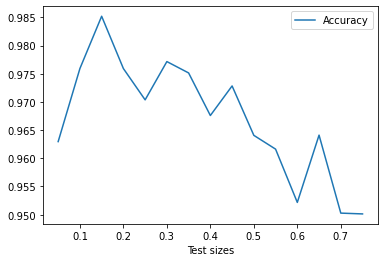

In [44]:
learning_df[['Test sizes', 'Accuracy']].plot(x='Test sizes');

Test accuracy peaks at %98.5203 when we use 15% of the data for testing and 85% for training. Which is slightly higher than the best performing traditinoal ML method Support Vector Machine classifier. 

In [5]:
model.set_weights(random_weights)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, 
                                                    test_size=.15, random_state=1)
pca = PCA(n_components=1000)
X_all_train = pca.fit_transform(X_all_train)
X_all_test = pca.transform(X_all_test)

model.fit(X_all_train, y_all_train, epochs=100, 
   batch_size=20)

Epoch 1/100
230/230 [==============================] - 1s 2ms/step - loss: 3.9219 - accuracy: 0.6726
Epoch 2/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9704
Epoch 3/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9835
Epoch 4/100
230/230 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9942
Epoch 5/100
230/230 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9936
Epoch 6/100
230/230 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9953
Epoch 7/100
230/230 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9961
Epoch 8/100
230/230 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9885
Epoch 9/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9833
Epoch 10/100
230/230 [==============================] - 0s 2ms/step - loss: 0.2579 - accura

### Confusion Matrix for the Deep Learning Classifier

Test accuracy is 98.14814814814815%


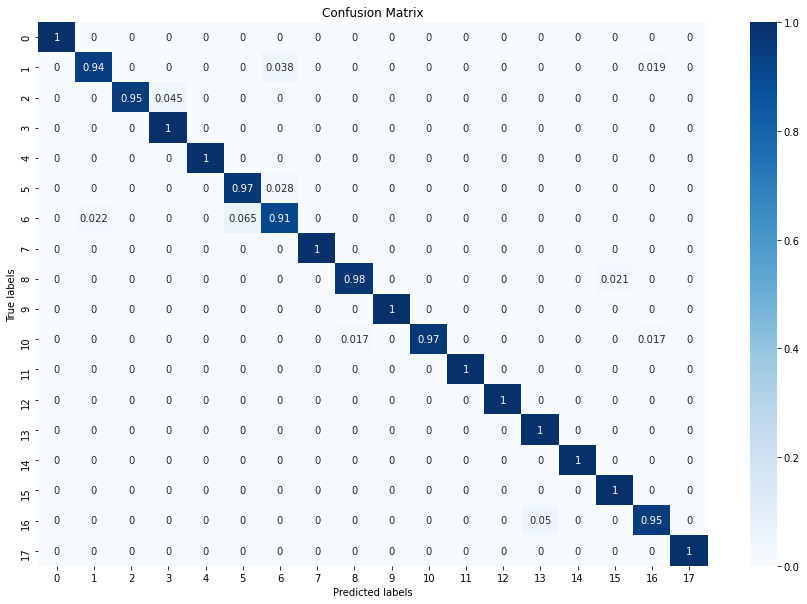

In [43]:
y_all_pred = (model.predict(X_all_test) > .5)
y_all_test_i = np.array([np.argmax(i) for i in y_all_test])
y_all_pred_i = np.array([np.argmax(i) for i in y_all_pred])

cf_matrix = confusion_matrix(y_all_test_i, y_all_pred_i, normalize='true')

test_accuracy = (y_all_pred_i == y_all_test_i).sum() / len(y_all_test_i)
print(f"Test accuracy is {test_accuracy * 100}%")

fig, ax = plt.subplots(figsize=(15,10))
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');